ANALYSING USING SENTIMENT ANALYSIS AND NLP FOR BANKING CUSTOMERS

The objetive of the case study is to analyze customer reviews and predict customer satisfaction with the reviews.
Here, we are using pre-made Datasets

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

### Import the data set

In [ ]:
customer = pd.read_csv("Review.csv", encoding='latin1')


In [ ]:
customer.head()

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      505 non-null    object
 1   Stars     505 non-null    int64 
 2   Reviews   505 non-null    object
 3   BankName  505 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.9+ KB


In [ ]:
customer.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [ ]:
customer['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

## Sentiment Analysis to find positive and negative reviews

In [ ]:
X = customer['Reviews']
Y = customer['Stars']

In [ ]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In this user-defined function (UDF), we use the TextBlob library to analyze the sentiment polarity of a review. The function calculates the polarity score, where positive values indicate a positive sentiment, zero implies neutrality, and negative values denote a negative sentiment. The function then returns the corresponding sentiment label.

In [ ]:
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'

We iterate through a collection of reviews stored in the variable X. For each review, we create a dictionary that pairs the 'Review' key with the text and the 'Sentiment' key with the sentiment obtained using our sentiment analysis function. These dictionaries are then collected into a list named final_dictionary, displaying the first five entries.







In [ ]:
final_dictionary = []
for text in X:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but 


The code identifies positive reviews by iterating through the list of review-sentiment pairs (final_dictionary). For each entry, it checks if the sentiment is 'Positive' and adds the corresponding review to the positive_reviews list. The script then prints the first five positive reviews, providing a glimpse of the positively perceived sentiments.

In [ ]:
positive_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Positive':
        positive_reviews.append(review)
print(positive_reviews[:5])


[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled\xa0together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less', 'Sentimen

It identifies reviews labeled as 'Neutral' and adds them to the new list. The script concludes by printing the first five entries from the list, offering insight into the sentiment-neutral reviews in the dataset.

In [ ]:
neutral_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_reviews.append(review)
print(neutral_reviews[:5])

[{'Review': '\r\nPerson with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho\' he said he wasn\'t a salesman. Closing costs were astronomical.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': '\r\nThe rate re-lock-in rule was not followed.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': "\r\nLending tree matching me up with companies that don't offer the product I requested.\r\n        ", 'Sentiment': 'Neutral'}, {'Review': '\r\nThey called me and asked about the city in NH that we where looking at and when I told him we might consider MA as well he hung up on me.\r\n        ', 'Sentiment': 'Neutral'}]


We identify reviews labeled as 'Negative' and accumulate them in the new list. The script then prints the first five entries from this list, providing a snapshot of reviews characterized by a negative sentiment in the dataset.

In [ ]:
# Finding negative reviews
negative_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Negative':
        negative_reviews.append(review)
print(negative_reviews[:5])

[{'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 a

In [ ]:
# counting number of positive,neutral and negative reviews
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])

In [ ]:
reviews_count

,0
Positive,466
Neutral,4
Negative,35


#REVIEWING THE COUNT OF POSITIVE, NEGATIVE AND NEUTRAL TONES
Helping us understand the progress of current Schemes and Introducing new targets

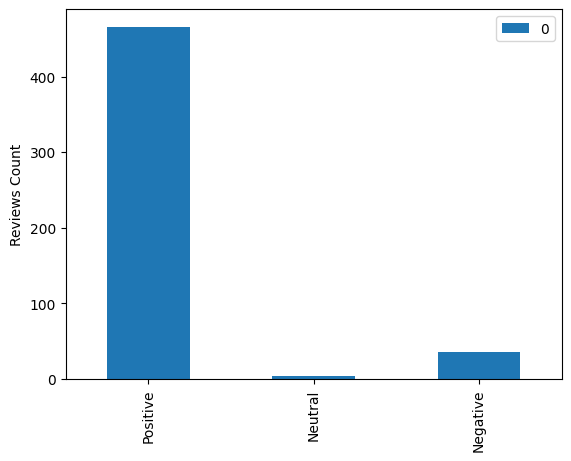

In [ ]:
reviews_count.plot(kind='bar')
plt.ylabel('Reviews Count')
plt.show()

Segregating Positive and Negative Reviews And Viewing them in Batches

*   Makes Segregating Easier(By Staff)



In [ ]:
# printing first five positive reviews
i=1
for review in positive_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!
******************************************************
2
Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!
******************************************************
3
We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindR

In [ ]:
# printing first five negative reviews
i=1
for review in negative_reviews[:5]:
        print(i)
        print(review['Review'])
        print('******************************************************')
        i+=1

1
We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind
******************************************************
2
This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to se

## Finding most frequently used Positive/ Negative words

We try to find the most frequently used positive/negative words using Tokenization,Filtering, Counting and Ranking


###  - Data Preprocessing

The function removes punctuation, strips extra spaces, and converts each word to lowercase, ensuring a standardized and cleaned representation of the text data for further analysis or processing.







In [ ]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [ ]:
X = X.apply(lambda y: clean_text(y))

In [ ]:
X.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: Reviews, dtype: object

### Coverting reviews to tokens

We're transforming reviews into a structured format using the CountVectorizer. It turns each review into a set of words (tokens) and counts how many times each word appears. The resulting matrix helps analyze and compare reviews based on the frequency of specific words, providing a numerical representation of the text data.

In [ ]:
tokens_vect = CountVectorizer(stop_words='english')

In [ ]:
token_dtm = tokens_vect.fit_transform(X)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!.", "A good rate but a very frustrating process, constant delays, decisions made then changed, overwhelmed underwriting team with 3 week back log, rookie mistake related to Texas law that caused an additional 2 week "]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print(feature_names)


['additional' 'an' 'and' 'back' 'but' 'capital' 'caused' 'changed'
 'constant' 'decisions' 'delays' 'each' 'frustrating' 'good' 'great'
 'helped' 'job' 'law' 'log' 'made' 'mistake' 'move' 'our' 'overwhelmed'
 'person' 'process' 'professional' 'rate' 'refinance' 'related' 'rookie'
 'smoothly' 'team' 'texas' 'thank' 'that' 'then' 'through' 'to'
 'underwriting' 'us' 'very' 'was' 'week' 'with' 'wyndham' 'you']


In [ ]:
token_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
token_dtm.toarray().shape

(505, 2507)

In [ ]:
len(tokens_vect.get_feature_names_out())

2507

In [ ]:
pd.DataFrame(token_dtm.toarray(),columns = tokens_vect.get_feature_names_out())

,10,100,101,1014,1031,1040s,11,12,13,15,...,xx,year,years,yelp,yep,yes,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(token_dtm)

  (0, 1022)	1
  (0, 1244)	1
  (0, 2495)	1
  (0, 365)	1
  (0, 1649)	1
  (0, 1739)	1
  (0, 1081)	1
  (0, 1857)	1
  (0, 1727)	1
  (0, 2092)	1
  (0, 2254)	1
  (1, 1739)	1
  (1, 1081)	1
  (1, 2254)	1
  (1, 1423)	2
  (1, 1945)	1
  (1, 1082)	1
  (1, 557)	1
  (1, 1736)	1
  (1, 1487)	1
  (1, 820)	1
  (1, 2037)	1
  (2, 2495)	4
  (2, 365)	1
  (2, 1487)	3
  :	:
  (504, 170)	1
  (504, 2298)	3
  (504, 200)	2
  (504, 1812)	1
  (504, 1827)	1
  (504, 528)	3
  (504, 48)	1
  (504, 929)	1
  (504, 24)	2
  (504, 30)	1
  (504, 55)	2
  (504, 1441)	2
  (504, 1115)	2
  (504, 812)	1
  (504, 239)	1
  (504, 2206)	1
  (504, 2230)	1
  (504, 2229)	2
  (504, 1287)	1
  (504, 829)	1
  (504, 844)	2
  (504, 50)	1
  (504, 1891)	2
  (504, 493)	1
  (504, 685)	1


For each word, we used the sentiment_review function to assess its sentiment polarity, and the results were added to the DataFrame. This step enriches our data, offering sentiment information for each word in a straightforward manner.

In [ ]:
count_dtm_dataframe = pd.DataFrame(np.sum(token_dtm.toarray(),axis=0),tokens_vect.get_feature_names_out()).reset_index()
count_dtm_dataframe.columns =['Word','Count']

In [ ]:
count_dtm_dataframe.head()

,Word,Count
0,10,10
1,100,9
2,101,1
3,1014,1
4,1031,2


For every word in the DataFrame, we used sentiment_review to find its sentiment and stored the results in a new column. This upgrade equips our dataset with sentiment information for each word, offering valuable insights.

In [ ]:
sentiment_word = []
for word in count_dtm_dataframe['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_dataframe['Sentiment'] = sentiment_word

In [ ]:
count_dtm_dataframe.head()

,Word,Count,Sentiment
0,10,10,Neutral
1,100,9,Neutral
2,101,1,Neutral
3,1014,1,Neutral
4,1031,2,Neutral


We isolated positive words from the word count DataFrame (count_dtm_dataframe). By filtering rows with 'Positive' sentiment in the 'Sentiment' column, we created a new DataFrame (positive_words_df) that displays positive words sorted by their frequency in descending order.

In [ ]:
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [ ]:
positive_words_df.head(20)

,Word,Count,Sentiment
1022,great,139,Positive
278,best,99,Positive
1739,professional,70,Positive
746,easy,65,Positive
1095,highly,64,Positive
2257,thanks,61,Positive
2207,sure,51,Positive
64,able,47,Positive
1008,good,39,Positive
1056,happy,37,Positive



This code creates a word cloud showcasing the top 10 positive words. It uses the WordCloud library to generate the visual, pulling the positive words from a DataFrame. The resulting image highlights the most frequent positive terms, providing a quick and intuitive overview.







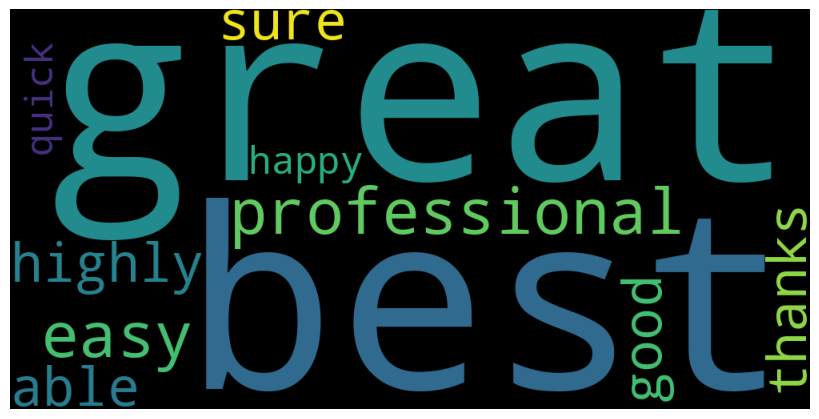

In [ ]:
# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In this code, we isolated and organized negative words from our dataset. By filtering a DataFrame based on the 'Negative' sentiment. This provides a clear view of the most common negative terms for further analysis and understanding.
We can concentrate and make schemes related to those issues







In [ ]:
# separating negative words
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [ ]:
negative_words_df.head(10)

,Word,Count,Sentiment
436,closed,68,Negative
858,extremely,46,Negative
1059,hard,40,Negative
1686,poor,32,Negative
489,complicated,18,Negative
1352,little,15,Negative
1715,previous,13,Negative
1619,past,13,Negative
829,expected,11,Negative
2127,spent,11,Negative


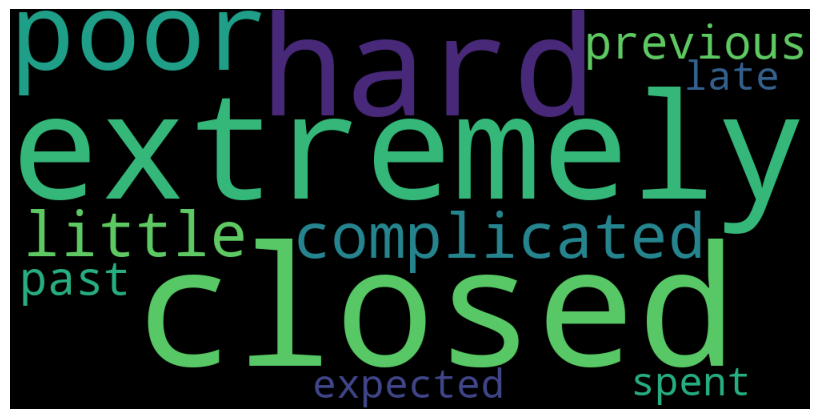

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:11,0]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

This code enhances our customer reviews dataset by adding several insightful features. It calculates and appends the review length, punctuation count, positive word count, and negative word count to each review entry. These metrics offer a quantitative perspective on review characteristics, aiding in more nuanced analysis and interpretation of customer sentiments.







In [ ]:

customer['Review_Length'] = customer['Reviews'].apply(lambda x: len(x.split()))
customer['Punctuation_Count'] = customer['Reviews'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
customer['Positive_Word_Count'] = customer['Reviews'].apply(lambda x: sum(1 for word in x.split() if sentiment_review(word) == 'Positive'))
customer['Negative_Word_Count'] = customer['Reviews'].apply(lambda x: sum(1 for word in x.split() if sentiment_review(word) == 'Negative'))



In [ ]:
print(customer.head())

         Date  Stars                                            Reviews  \
0  10-04-2017      5  Great job, Wyndham Capital! Each person was pr...   
1  10-02-2017      5  Matthew Richardson is professional and helpful...   
2  21-08-2017      5  We had a past experience with Wyndham Mortgage...   
3  17-12-2017      5  We have been dealing with Brad Thomka from the...   
4  27-05-2016      5  I can't express how grateful I am for the supp...   

                   BankName  Review_Length  Punctuation_Count  \
0  Wyndham Capital Mortgage             19                  4   
1  Wyndham Capital Mortgage             25                  4   
2  Wyndham Capital Mortgage             79                  8   
3  Wyndham Capital Mortgage            108                  9   
4  Wyndham Capital Mortgage             59                  6   

   Positive_Word_Count  Negative_Word_Count  
0                    3                    0  
1                    4                    0  
2                   

Exports the customer dataset with added features (review length, punctuation, positive/negative word counts) to 'customer_with_features.csv' for analysis.

In [ ]:
customer.to_csv('customer_with_features.csv', index=False)